# Dropout: To Prevent Neural Networks from Overfitting

A neural network with a large number of parameters (e.g., many layers, neurons, or features) has a higher capacity to learn complex patterns in the training data. However, a highly complex model may also memorize noise in the training data, leading to overfitting.

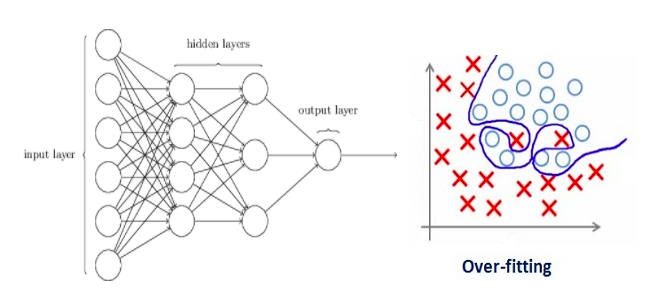

**Dropout regularization** can be applied to neural networks for classification tasks in a similar manner as for regression tasks.

Dropout helps prevent overfitting by randomly dropping out (setting to zero) a fraction of input units (or neurons) during training, forcing the network to learn more robust features and reducing reliance on individual neurons.

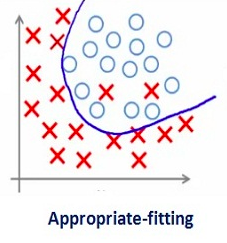

### How you can apply dropout regularization to a neural network for classification?

* **Model Architecture**: Define a neural network architecture suitable for classification. This typically includes an input layer, one or more hidden layers, and an output layer with softmax activation for multi-class classification or sigmoid activation for binary classification.

* **Dropout Layer**: Add dropout layers to the hidden layers of the neural network. Dropout layers randomly set a fraction of input units to zero during training, which helps prevent overfitting.

* **Training**: Train the neural network with dropout enabled during training. Dropout is applied only during training, not during inference (prediction).

* **Prediction**: During prediction (inference), disable dropout to allow all units to contribute to the prediction.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2024-04-19 08:34:43.053882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 08:34:43.054093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 08:34:43.261304: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Building a dataset

In [3]:
inputs, target = make_circles(n_samples = 500, noise = 0.1, random_state = 42)

<Axes: >

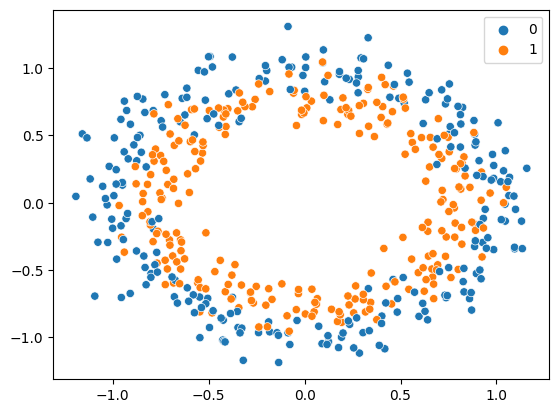

In [4]:
sns.scatterplot(x = inputs[:,0], y= inputs[:,1], hue = target)

In [5]:
train_input, test_input, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

### Building Fully Connected Neural Network


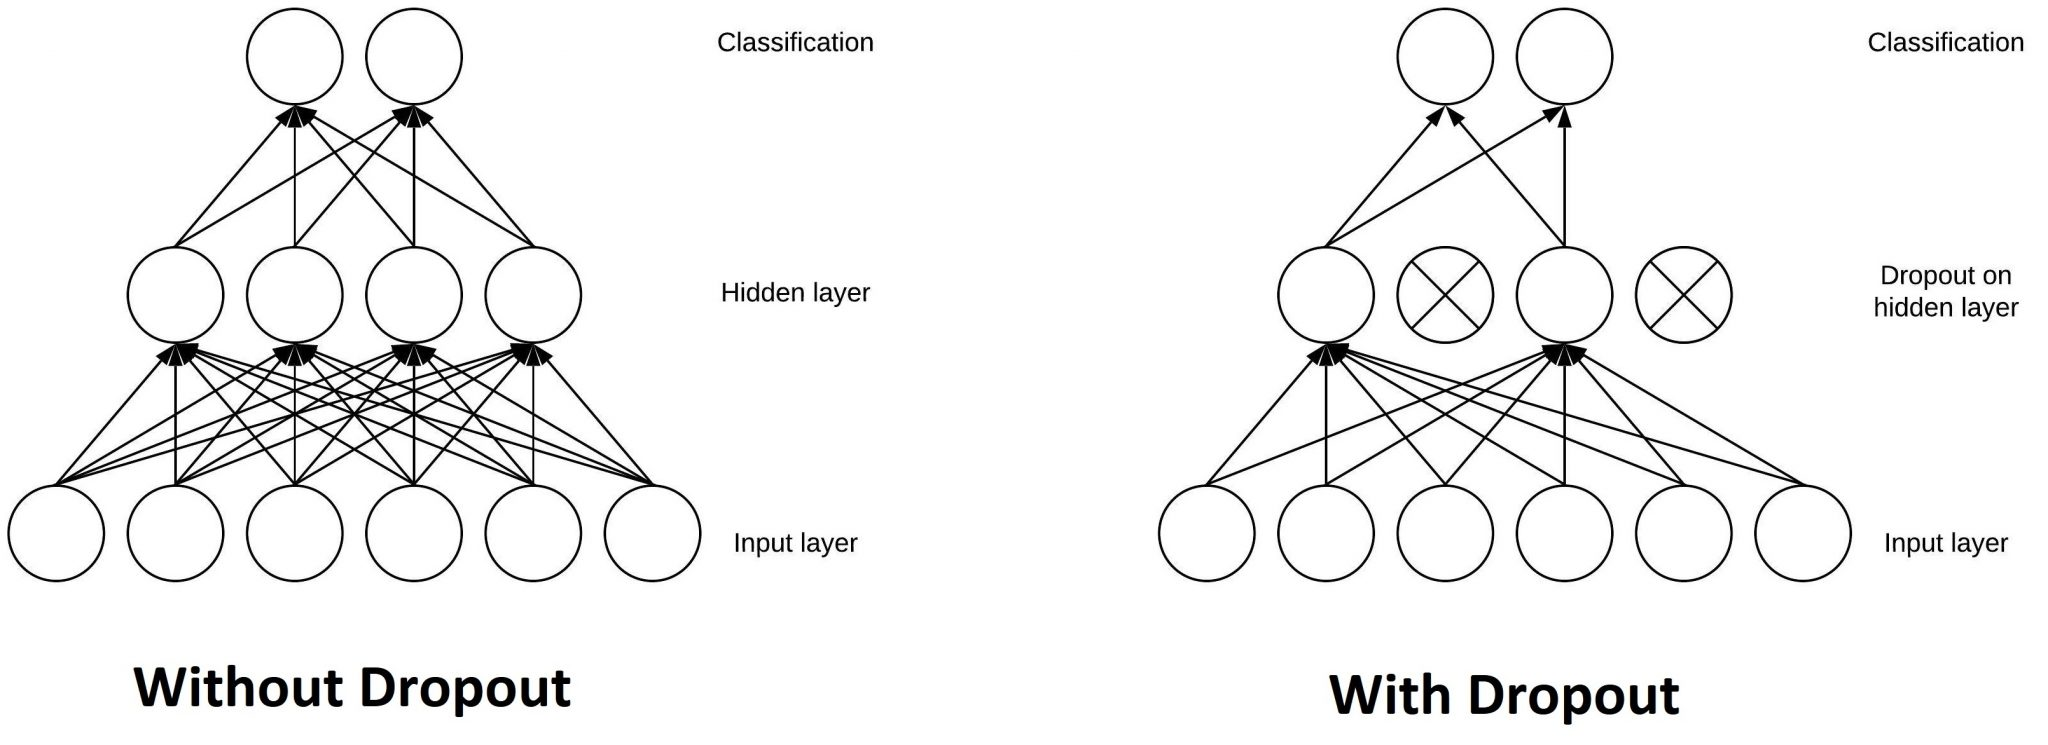

In [6]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(train_input, train_target, epochs=500, validation_split = 0.2)

Epoch 1/500


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5041 - loss: 0.6910 - val_accuracy: 0.5875 - val_loss: 0.6771
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5355 - loss: 0.6776 - val_accuracy: 0.5875 - val_loss: 0.6775
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5362 - loss: 0.6756 - val_accuracy: 0.5875 - val_loss: 0.6789
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5116 - loss: 0.6832 - val_accuracy: 0.6125 - val_loss: 0.6796
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5717 - loss: 0.6754 - val_accuracy: 0.6125 - val_loss: 0.6766
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5683 - loss: 0.6758 - val_accuracy: 0.5875 - val_loss: 0.6668
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5204 - loss: 0.6701 - val_accuracy: 0.5625 - val_loss: 0.6729
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - loss: 0.6682 - val_accuracy: 0.5625 - val_loss: 0.

In [7]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


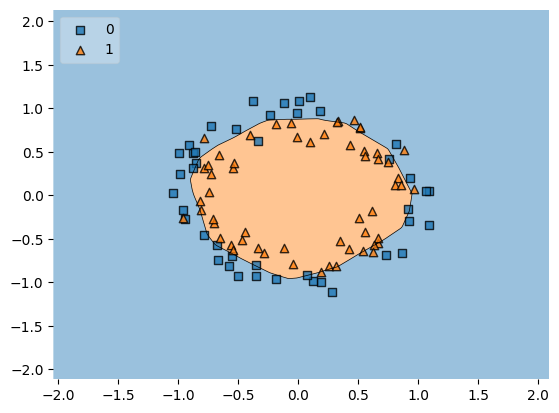

In [8]:
plot_decision_regions(test_input, test_target.ravel(), clf = model, legend=2)
plt.show()

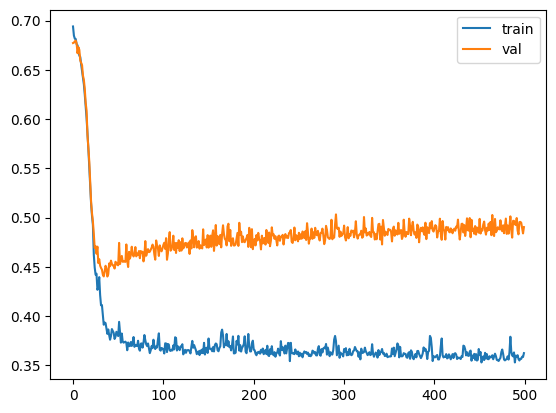

In [10]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "val")
plt.legend()
plt.show()

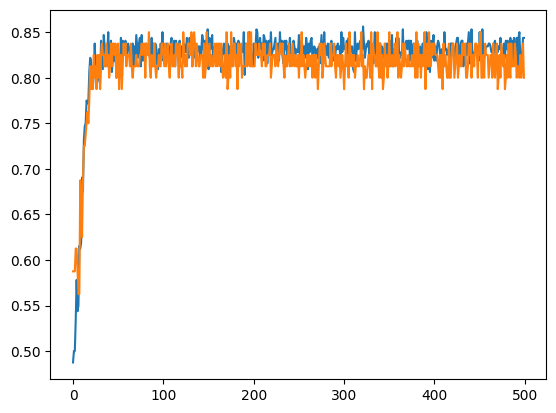

In [11]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "val")

### Dropout Model 

In [12]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=2, activation="relu"))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation="relu"))
model_1.add(Dropout(0.5))

model_1.add(Dense(1, activation="sigmoid"))

model_1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model_1.fit(train_input, train_target, epochs=500, validation_split = 0.2)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4726 - loss: 0.6935 - val_accuracy: 0.5500 - val_loss: 0.6852
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5023 - loss: 0.6952 - val_accuracy: 0.5875 - val_loss: 0.6815
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5187 - loss: 0.6836 - val_accuracy: 0.5875 - val_loss: 0.6797
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5362 - loss: 0.6735 - val_accuracy: 0.5875 - val_loss: 0.6788
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4994 - loss: 0.6814 - val_accuracy: 0.5875 - val_loss: 0.6787
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5562 - loss: 0.6829 - val_accuracy: 0.5875 - val_loss: 0.6784
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5579 - loss: 0.6784 - val_accuracy: 0.6125 - val_loss: 0.6791
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4652 - loss: 0.6848 - val_accuracy: 0.5125 - 

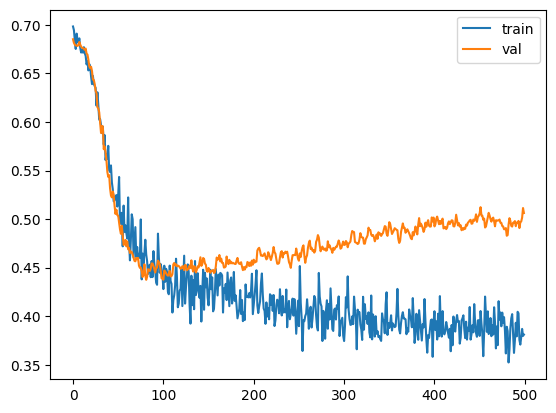

In [13]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "val")
plt.legend()
plt.show()

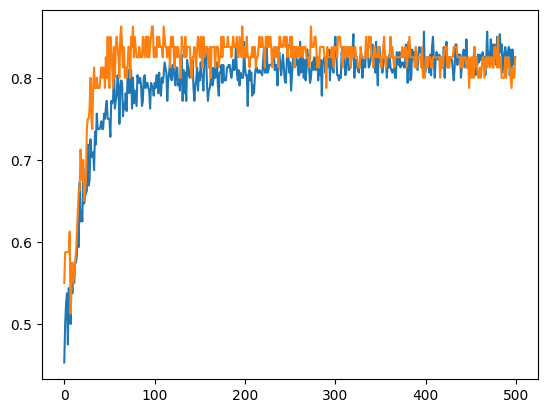

In [14]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "val")
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


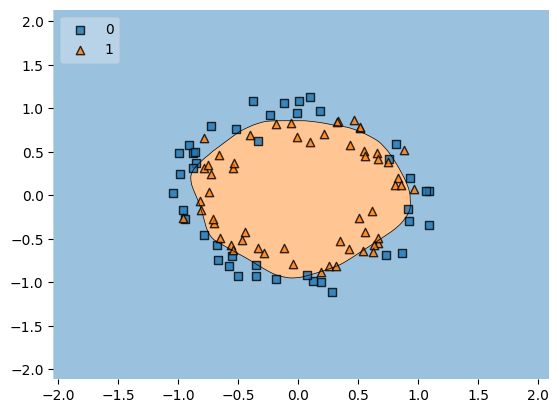

In [16]:
plot_decision_regions(test_input, test_target.ravel(), clf = model_1, legend=2)
plt.show()

After applying dropout regularization to the neural network for classification, we observed the following results:

* **Training Accuracy**: The training accuracy was found to be approximately 80.67%.
* **Validation Accuracy**: The validation accuracy, measured on a separate validation set, was found to be approximately 82.50%.

These results suggest that the dropout regularization technique helped prevent overfitting and improve the generalization performance of the neural network. The validation accuracy is close to the training accuracy, indicating that the model has learned to generalize well to unseen data.

### In conclusion,

applying dropout regularization to the neural network for classification has resulted in a model that performs well both on the training and testing datasets, with more generalized decision boundary. 

This indicates that the model has learned to generalize well and is less likely to overfit to the training data.

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.